In [35]:
import numpy as np 
import pandas as pd 
import scipy 
import cv2 
from matplotlib import pyplot as plt 
import tensorflow as tf 
from tensorflow import keras 
from keras.models import Model 
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img
from keras.optimizers import Adam 
from keras.applications.vgg16 import VGG16
from keras.layers import Dense,Input,GlobalAveragePooling2D 
from keras.models import load_model

In [36]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator=train_datagen.flow_from_directory("C:/Users/lenovo/OneDrive/Documents/DOGS_CATS",
                                                  target_size=(244,244),
                                                  color_mode='rgb',
                                                  batch_size=32,
                                                  class_mode='categorical',
                                                  shuffle=True)

Found 4 images belonging to 2 classes.


In [37]:
train_generator.class_indices.values()
NO_CLASS=len(train_generator.class_indices.values())
train_generator.class_indices.values()

dict_values([0, 1])

In [38]:
model=VGG16(include_top=False,input_shape=(244,244,3))
x=model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dense(512,activation='relu')(x)
pred=Dense(NO_CLASS,activation='softmax')(x)
model=Model(model.input,pred)


In [39]:
for layer in model.layers[:19]:
    layer.trainable=False
for layer in model.layers[19:]:
    layer.trainable=True

In [40]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['mean_squared_error'])

In [41]:
model.fit(x=train_generator,epochs=10,verbose=1,batch_size=32)

Epoch 1/10


1/1 [==============================] - 4s 4s/step - loss: 0.7069 - mean_squared_error: 0.2568
Epoch 2/10
1/1 [==============================] - 2s 2s/step - loss: 0.7933 - mean_squared_error: 0.3054
Epoch 3/10
1/1 [==============================] - 2s 2s/step - loss: 0.7820 - mean_squared_error: 0.3004
Epoch 4/10
1/1 [==============================] - 2s 2s/step - loss: 0.3894 - mean_squared_error: 0.1262
Epoch 5/10
1/1 [==============================] - 2s 2s/step - loss: 0.2558 - mean_squared_error: 0.0587
Epoch 6/10
1/1 [==============================] - 2s 2s/step - loss: 0.2479 - mean_squared_error: 0.0661
Epoch 7/10
1/1 [==============================] - 2s 2s/step - loss: 0.1047 - mean_squared_error: 0.0122
Epoch 8/10
1/1 [==============================] - 2s 2s/step - loss: 0.0552 - mean_squared_error: 0.0044
Epoch 9/10
1/1 [==============================] - 2s 2s/step - loss: 0.0477 - mean_squared_error: 0.0051
Epoch 10/10
1/1 [==============================] - 2s 2s/step - lo

In [82]:
class_dict={0:'Cat',1:'Dog'}
img_test=cv2.imread("C:/Users/lenovo/OneDrive/Documents/DOGS_CATS/CAT/download.jpeg",cv2.IMREAD_UNCHANGED)
size=(244,244)
img_test=cv2.resize(img_test,size)

In [83]:
x=img_test
x=np.expand_dims(img_test,axis=0)
mod=tf.keras.applications.imagenet_utils.preprocess_input(x)

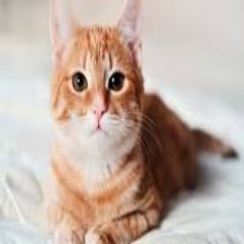

1/1 [==============================] - 1s 1s/step
[[1.000000e+00 9.241033e-19]]
0
Category:  Cat


In [84]:
from IPython.display import Image,display
cv2.imwrite("C:/Users/lenovo/OneDrive/Documents/DOGS_CATS/CAT/download.jpeg",img_test)
display(Image(filename="C:/Users/lenovo/OneDrive/Documents/DOGS_CATS/CAT/download.jpeg"))
predicted_model=model.predict(x)
print(predicted_model)
print(predicted_model[0].argmax())
print("Category: ",class_dict[(predicted_model[0].argmax())])



